In [2]:
import numpy as np
import matplotlib.pyplot as plt

###### 1a)

In [3]:
#importing data and labeling
tweetdata = np.genfromtxt('tweet_counts.csv', delimiter=',')

WeekNum = tweetdata.T[0]
TweetCount = tweetdata.T[1]
TweetAverage=np.average(TweetCount)
TweetAverage

38.76923076923077

###### 1b)

Text(0.5, 1.0, 'Weekly Tweet Counts')

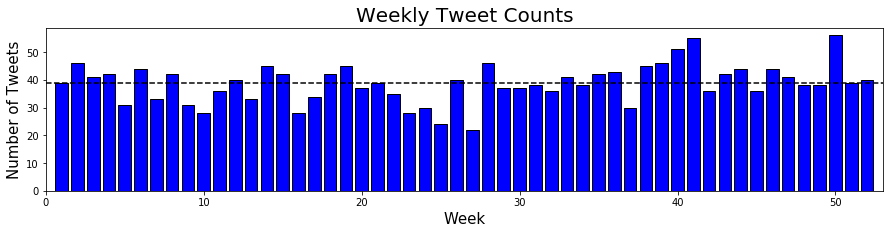

In [4]:
#plotting imported data
plt.figure(figsize=(15,3))
plt.bar(WeekNum,TweetCount, color='blue',edgecolor='black')
plt.hlines(TweetAverage,0,53,linestyles='dashed')
plt.xlim(0,53)
plt.xlabel('Week',fontsize=15)
plt.ylabel('Number of Tweets',fontsize=15)
plt.title('Weekly Tweet Counts', fontsize=20)

###### 1c)

$P(\lambda)=\alpha e^{-\lambda\alpha}$

$E(\lambda)=\int_{0}^{\infty}\lambda\alpha e^{-\lambda\alpha}  d\lambda$ 

Integrating with respect to $\lambda$:

$E(\lambda)=\int_{0}^{\infty}-(\lambda+1/\alpha)e^{-\lambda/\alpha} +C$

Evaluating across $\infty$ = 0

Evaluating across 0 = - 1/$\alpha$

So, $E(\lambda)= 1/\alpha$

###### 1d)

From 1c, we proved that $E(\lambda)= 1/\alpha$, and in part 1a we get average of $\lambda=38.77$, so we will assume $\alpha = 1/38.77 = 0.0258$

In [5]:
#Exponential function from discussion for prior probability
Exponential=lambda λ,α: α*np.exp(-λ*α)
Exponential=np.vectorize(Exponential)

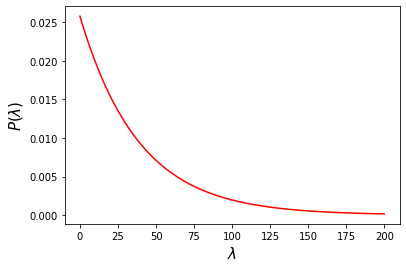

In [6]:
#Graphing estimated prior of weekly tweet data
plt.plot(np.linspace(0,200,1000),Exponential(np.linspace(0,200,1000),0.0258),c='r')
plt.xlabel('$\lambda$', fontsize=15)
plt.ylabel('$P(\lambda)$', fontsize=15)
plt.show()

###### 1e)

In [7]:
#making empty gridspaces to search through
a = np.linspace(25,50,50)
b = np.linspace(25,50,50)
c = np.arange(1,53,1)

We have 3 variables that we are trying to solve for their posterior probabilities ($\lambda1, \lambda2$, and Ws).
From Bayes Statistics we know that the posterior probability is computed by the product of the likelihood functions and the prior probabilities. The likelihood functions will be computed as Poisson Functions and the priors will be exponential functions for $\lambda1$ and $\lambda2$. From there you can solve for the marginalize posteriors for each variable. 

###### 1f)

In [13]:
#Poisson function from discussion 
Poisson=lambda k,λ: (λ**k)*np.exp(-λ)/np.math.factorial(k)
Poisson=np.vectorize(Poisson)
#Defining Posterior function that takes gridspaces as inputs and multiplies out priors and likelihood functions for posteriors
def Posterior(lamba1,lamba2,W_s):
    P=1
    for i in TweetCount[WeekNum<W_s]:
        P=P*Poisson(i,lamba1)*0.0258*np.exp(-0.0258*lamba1)
    for j in TweetCount[WeekNum>=W_s]:
        P=P*Poisson(j, lamba2)*0.0258*np.exp(-0.0258*lamba2)
    return P
        

In [14]:
Post=Posterior(a,b,c)

Posterior_norm=Post/np.trapz(Post,a)
#Normalizing Posterior data
Posterior_norm


array([1.67344654e-66, 1.23729884e-60, 4.08368502e-55, 6.20796630e-50,
       4.47706147e-45, 1.57503825e-40, 2.77513862e-36, 2.51070949e-32,
       1.19419271e-28, 3.05373791e-25, 4.28828428e-22, 3.37427310e-19,
       1.51648527e-16, 3.96431544e-14, 6.13339921e-12, 5.70968889e-10,
       3.24895162e-08, 1.14715384e-06, 2.54965381e-05, 3.61641570e-04,
       3.31671852e-03, 1.99168988e-02, 7.92565978e-02, 2.11421219e-01,
       3.82254960e-01, 4.73418760e-01, 4.05729740e-01, 2.42975924e-01,
       1.02634770e-01, 3.08562360e-02, 6.65995544e-03, 1.04063976e-03,
       1.18663201e-04, 9.95120712e-06, 6.18322356e-07, 2.86716561e-08,
       9.99074047e-10, 2.63361631e-11, 5.28590599e-13, 8.12839069e-15,
       9.63434670e-17, 8.85317937e-19, 6.34276341e-21, 3.56223758e-23,
       1.57658938e-25, 5.52686081e-28, 1.54221631e-30, 3.44186789e-33,
       6.17214371e-36, 8.93346013e-39])

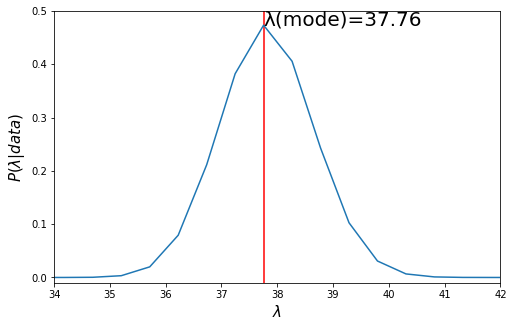

In [15]:
#plotting posterior data
λ_mode=a[np.argmax(Posterior_norm)]
λ_mode


plt.figure(figsize=(8,5))
plt.plot(a,Posterior_norm)
plt.vlines(λ_mode,-0.01,0.50,color='red')
plt.xlabel('$\lambda$',fontsize=15)
plt.ylabel('$P(λ|data)$',fontsize=15)
plt.ylim(-0.01,0.50)
plt.xlim(34,42)
plt.text(λ_mode,np.max(Posterior_norm),'λ(mode)={:0.2f}'.format(λ_mode),fontsize=20)
plt.show()

In [23]:
#creating 3-D mesh gridpsace for posterior
lamda1_mesh=np.meshgrid(a,b,c)
lamda2_mesh=np.meshgrid(a,b,c)
Ws_mesh=np.meshgrid(a,b,c)

In [25]:
#vectorizing posterior function to be used in 3-D meshspace
Posterior=np.vectorize(Posterior)
Post_mesh=Posterior(lamda1_mesh,lamda2_mesh,Ws_mesh)

In [57]:
#Margininalizing data from 3-D gridspace to get 1D posteriors for each variable
Post_mesh.shape
Ws_marg = np.sum(Post_mesh, axis=1)
Ws_marg = np.sum(Ws_marg, axis = 1)
Ws_marg.shape
Ws_marg = Ws_marg[2]

lamda1_marg = np.sum(Post_mesh, axis=1)
lamda1_marg = np.sum(lamda1_marg, axis=2)
lamda1_marg.shape
lamda1_marg = lamda1_marg[0]

lamda2_marg = np.sum(Post_mesh, axis=1)
lamda2_marg = np.sum(lamda2_marg, axis=2)
lamda2_marg.shape
lamda2_marg = lamda2_marg[0]

Ws_norm=Ws_marg/np.trapz(Ws_marg,c)
lamda1_norm=lamda1_marg/np.trapz(lamda1_marg,a)
lamda2_norm=lamda2_marg/np.trapz(lamda2_marg,b)
Ws_norm

array([0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       1.71594435e-126, 6.28878891e-109, 3.56284850e-093, 4.45021198e-079,
       1.67344851e-066, 2.49380129e-055, 1.87922311e-045, 8.89730443e-037,
       3.21416741e-029, 1.05485243e-022, 3.68090346e-017, 1.57461148e-012,
       9.39631092e-009, 8.79809823e-006, 1.43915285e-003, 4.53741523e-002,
       3.01772847e-001, 4.60015733e-001, 1.73511049e-001, 1.73803833e-002,
       4.93638979e-004, 4.22436275e-006, 1.15248604e-008, 1.05648294e-011,
       3.41768416e-015, 4.08441901e-019, 1.88217795e-023, 3.48137732e-028,
       2.68380741e-033, 8.93347068e-039, 1.32740654e-044, 9.08462847e-051])

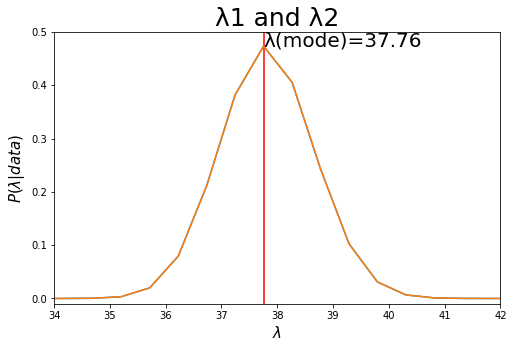

In [68]:
#Plotting lamda1 and lamda2
λ_mode=a[np.argmax(lamda1_norm)]
λ_mode


plt.figure(figsize=(8,5))
plt.plot(a,lamda1_norm)
plt.plot(b,lamda2_norm)
plt.vlines(λ_mode,-0.01,0.50,color='red')
plt.xlabel('$\lambda$',fontsize=15)
plt.ylabel('$P(λ|data)$',fontsize=15)
plt.ylim(-0.01,0.50)
plt.xlim(34,42)
plt.text(λ_mode,np.max(lamda1_norm),'λ(mode)={:0.2f}'.format(λ_mode),fontsize=20)
plt.title("λ1 and λ2", fontsize=25)
plt.show()

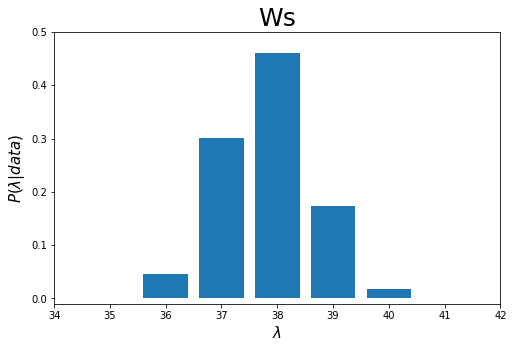

In [66]:
#plotting Ws
plt.figure(figsize=(8,5))
plt.bar(c,Ws_norm)
plt.xlabel('$\lambda$',fontsize=15)
plt.ylabel('$P(λ|data)$',fontsize=15)
plt.ylim(-0.01,0.50)
plt.xlim(34,42)
plt.title("Ws",  fontsize=25)
plt.show()